# Training
This noteook was developed to be run in Google Colab

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

tf.keras.backend.set_floatx('float32')

In [2]:
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/TFM'

NUM_FEATURES = 6
NUM_SAMPLES = 50
INPUT_LENGTH = NUM_FEATURES * NUM_SAMPLES

GESTURES = ['still', 'wave', 'swipe_left', 'swipe_down', 'swipe_right', 'swipe_up', 'stop', 'roll']

In [3]:
# Data loading
samples = []
labels = []

for gesture in GESTURES:
    print(f'Appending samples for {gesture}')
    for f in glob.glob(f'{ROOT_PATH}/dataset/normalized/{gesture}/*.csv'):
        df = pd.read_csv(f)
        array = df.to_numpy()
        samples.append(array)
        labels.append(GESTURES.index(gesture))
        print('*', end='')
    print('')

print(len(samples))
print(len(labels))

Appending samples for still
****************************************************************************************************
Appending samples for wave
****************************************************************************************************
Appending samples for swipe_left
****************************************************************************************************
Appending samples for swipe_down
****************************************************************************************************
Appending samples for swipe_right
****************************************************************************************************
Appending samples for swipe_up
****************************************************************************************************
Appending samples for stop
****************************************************************************************************
Appending samples for roll
*****************************************************

In [ ]:
# Data splitting
X = np.array(samples)
y = np.array(labels)

print(X.shape)
print(y.shape)

X = X.reshape(-1, INPUT_LENGTH)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 50, 6)
(800,)
(800, 300)
(800,)
(640, 300)
(640,)
(160, 300)
(160,)


## Giga Models
Models for Arduino Giga

### Convolutional Neural Network

In [5]:
# Model architecture
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_LENGTH,), dtype=tf.float32, name='input'),
    tf.keras.layers.Reshape((NUM_SAMPLES, NUM_FEATURES)),

    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(len(GESTURES), activation='softmax')
])

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 50, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 50, 32)              │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 50, 16)              │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 25, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,976 (35.06 KB)

 Trainable params: 8,880 (34.69 KB)

 Non-trainable params: 96 (384.00 B)

In [6]:
# Model Training
cnn_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1953 - loss: 1.9093 - val_accuracy: 0.2438 - val_loss: 1.8875
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4565 - loss: 1.4661 - val_accuracy: 0.3875 - val_loss: 1.6866
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5790 - loss: 1.1395 - val_accuracy: 0.5625 - val_loss: 1.4394
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6961 - loss: 0.7884 - val_accuracy: 0.7000 - val_loss: 1.2052
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7219 - loss: 0.6786 - val_accuracy: 0.7125 - val_loss: 1.0163
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7818 - loss: 0.5016 - val_accuracy: 0.8000 - val_loss: 0.8319
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8658 - loss: 0.3575 - val_accuracy: 0.8438 - val_loss: 0.6475
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8587 - loss: 0.2794 - val_accuracy: 0.8438 - 

In [7]:
# Evaluation
cnn_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0162 


[0.023108379915356636, 1.0]

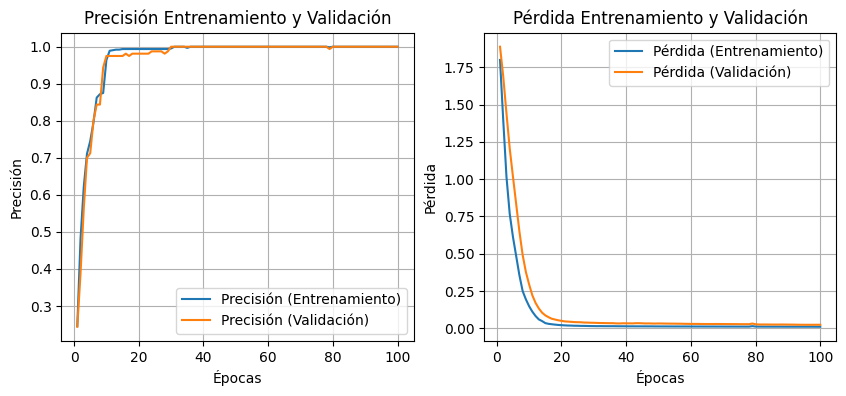

In [9]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

epochs = range(1, len(accuracy) + 1)  # Number of epochs

axes[0].plot(epochs, accuracy, label='Precisión (Entrenamiento)')
axes[0].plot(epochs, val_accuracy, label='Precisión (Validación)')
axes[0].set_title('Precisión Entrenamiento y Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend()
axes[0].grid()

axes[1].plot(epochs, loss, label='Pérdida (Entrenamiento)')
axes[1].plot(epochs, val_loss, label='Pérdida (Validación)')
axes[1].set_title('Pérdida Entrenamiento y Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend()
axes[1].grid()

In [ ]:
# Evaluation

cnn_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0046 


[0.0035161220002919436, 1.0]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


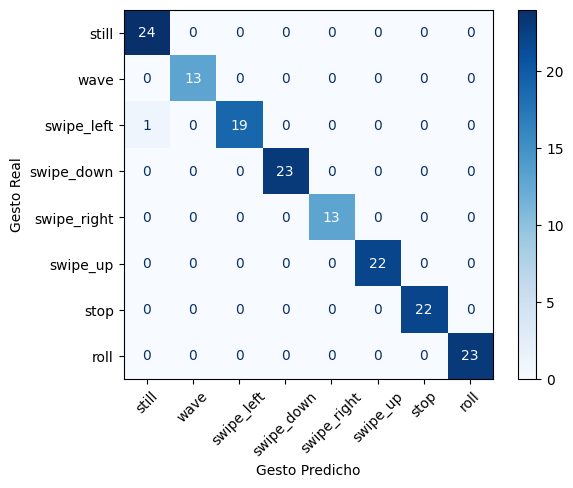

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GESTURES)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45)
plt.xlabel('Gesto Predicho')
plt.ylabel('Gesto Real')

plt.show()

In [ ]:
# Model Conversion

converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga"

with open(f"{BASE_PATH}/cnn_8g.tflite", 'wb') as f:
    f.write(tflite_model)

import os
model_size = os.path.getsize(f"{BASE_PATH}/cnn_8g.tflite")
print("Model size is %f kBs." % (model_size / 1024.0))

Saved artifact at '/tmp/tmpfwjo4fjb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='input')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  136843699780880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699778192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469390864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469390096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469391056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469390288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469391824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469392976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469393360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469391440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843469392208: TensorSpec(s

In [ ]:
# Conversion to header file

!echo "const unsigned char model[] = {" > "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/cnn_8g.h"
!cat "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/cnn_8g.tflite" | xxd -i      >> "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/cnn_8g.h"
!echo "};"                              >> "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/cnn_8g.h"

model_h_size = os.path.getsize(f"{BASE_PATH}/cnn_8g.h")
print(f"Header file is {model_h_size:,} bytes.")

Header file is 265,054 bytes.


### Dense Neural Network

In [ ]:
# Model architecture
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_LENGTH,), dtype=tf.float32, name='input'),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),

    tf.keras.layers.Dense(len(GESTURES), activation='softmax')
])

dnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 32)                  │           9,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,368 (40.50 KB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training
dnn_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = dnn_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1255 - loss: 2.1829 - val_accuracy: 0.2562 - val_loss: 1.9217
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4064 - loss: 1.6748 - val_accuracy: 0.3812 - val_loss: 1.6031
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4716 - loss: 1.3532 - val_accuracy: 0.5562 - val_loss: 1.3599
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6505 - loss: 1.0973 - val_accuracy: 0.6062 - val_loss: 1.1430
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7156 - loss: 0.8203 - val_accuracy: 0.6125 - val_loss: 0.9728
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7413 - loss: 0.7120 - val_accuracy: 0.7625 - val_loss: 0.8197
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.5485 - val_accuracy: 0.8250 - val_loss: 0.6439
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.3768 - val_accuracy: 0.8625 - val_loss

In [ ]:
# Evaluation
dnn_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9550 - loss: 0.1682 


[0.13548733294010162, 0.956250011920929]

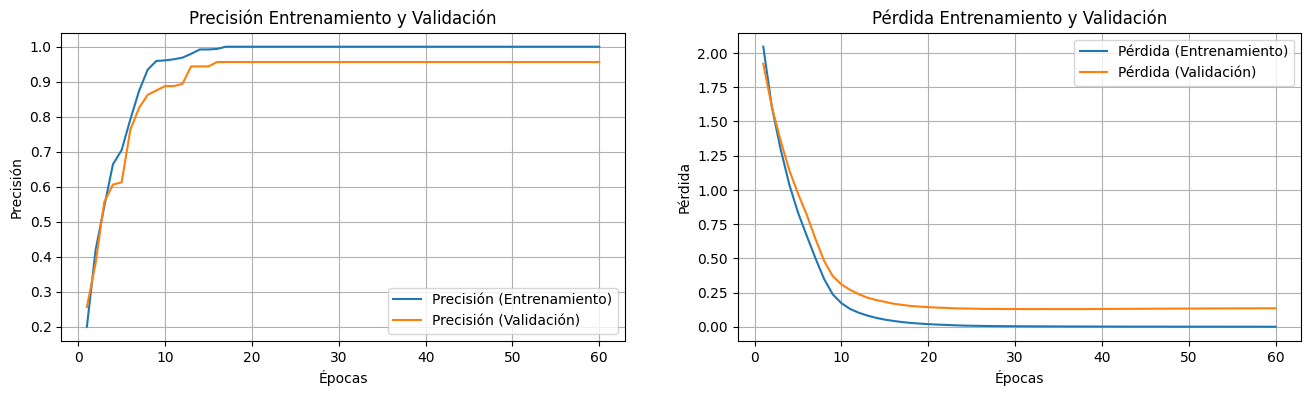

In [ ]:
# Accuracy and Loss plots
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

epochs = range(1, len(accuracy) + 1)  # Number of epochs

axes[0].plot(epochs, accuracy, label='Precisión (Entrenamiento)')
axes[0].plot(epochs, val_accuracy, label='Precisión (Validación)')
axes[0].set_title('Precisión Entrenamiento y Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend()
axes[0].grid()

axes[1].plot(epochs, loss, label='Pérdida (Entrenamiento)')
axes[1].plot(epochs, val_loss, label='Pérdida (Validación)')
axes[1].set_title('Pérdida Entrenamiento y Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend()
axes[1].grid()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


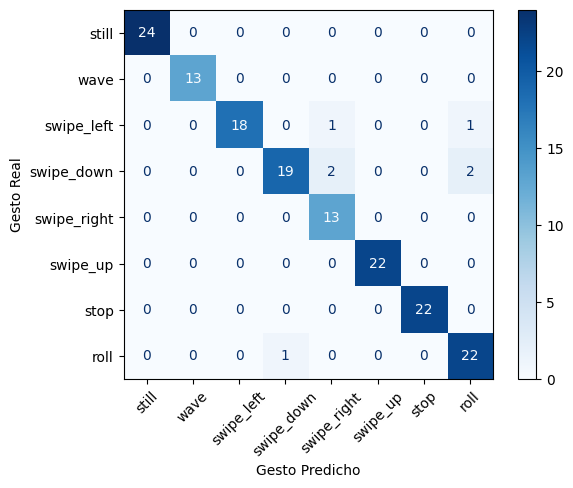

In [ ]:
y_pred = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GESTURES)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45)
plt.xlabel('Gesto Predicho')
plt.ylabel('Gesto Real')

plt.show()

In [ ]:
# Model Conversion
converter = tf.lite.TFLiteConverter.from_keras_model(dnn_model)
tflite_model = converter.convert()

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga"

with open(f"{BASE_PATH}/dnn_8g.tflite", 'wb') as f:
    f.write(tflite_model)

import os
model_size = os.path.getsize(f"{BASE_PATH}/dnn_8g.tflite")
print("Model size is %f kBs." % (model_size / 1024.0))

Saved artifact at '/tmp/tmpe_hn3hds'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='input')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  136843469400464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699768016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699770704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699769552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699773392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699778960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699775312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136843699773200: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model size is 42.906250 kBs.


In [ ]:
# Conversion to header file
!echo "const unsigned char model[] = {" > "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/dnn_8g.h"
!cat "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/dnn_8g.tflite" | xxd -i      >> "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/dnn_8g.h"
!echo "};"                              >> "/content/drive/MyDrive/Colab Notebooks/TFM/models_giga/dnn_8g.h"

model_h_size = os.path.getsize(f"{BASE_PATH}/dnn_8g.h")
print(f"Header file is {model_h_size:,} bytes.")

Header file is 270,974 bytes.


## Mega Models
Models for Arduino Mega

In [ ]:
dnn_mega = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_LENGTH,), dtype=tf.float32, name='input'),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),

    tf.keras.layers.Dense(len(GESTURES), activation='softmax')
])

dnn_mega.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │           4,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,296 (20.69 KB)

 Trainable params: 5,296 (20.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training
dnn_mega.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = dnn_mega.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2690 - loss: 1.9877 - val_accuracy: 0.3375 - val_loss: 1.8205
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4114 - loss: 1.6885 - val_accuracy: 0.4313 - val_loss: 1.5769
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5576 - loss: 1.3933 - val_accuracy: 0.6250 - val_loss: 1.2841
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 1.0644 - val_accuracy: 0.6562 - val_loss: 1.0268
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.8154 - val_accuracy: 0.7437 - val_loss: 0.8298
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8180 - loss: 0.6103 - val_accuracy: 0.7750 - val_loss: 0.6831
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.5070 - val_accuracy: 0.8500 - val_loss: 0.5612
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.4170 - val_accuracy: 0.9000 - val_loss

In [ ]:
# Evaluation
dnn_mega.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.1169 


[0.1378793716430664, 0.981249988079071]

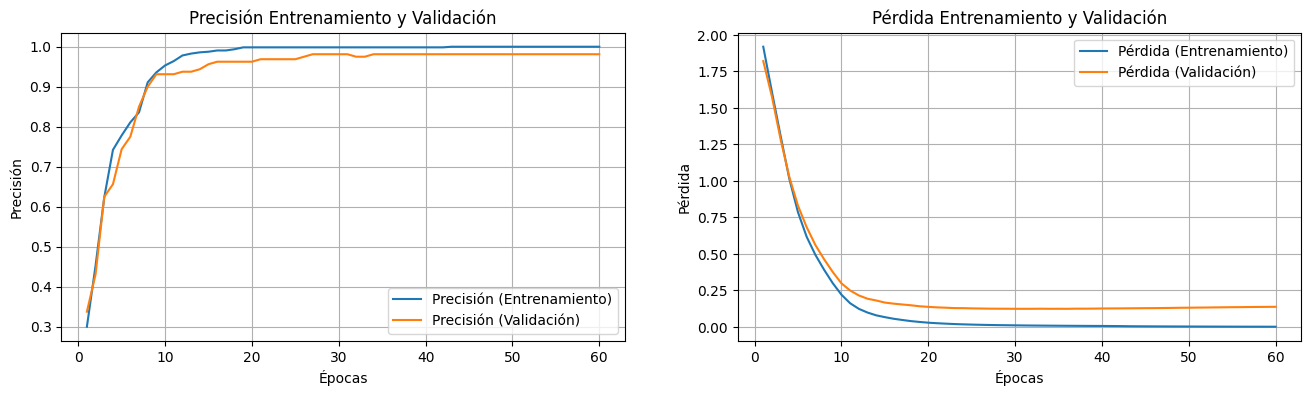

In [ ]:
# Accuracy and Loss plots
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

epochs = range(1, len(accuracy) + 1)  # Number of epochs

axes[0].plot(epochs, accuracy, label='Precisión (Entrenamiento)')
axes[0].plot(epochs, val_accuracy, label='Precisión (Validación)')
axes[0].set_title('Precisión Entrenamiento y Validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend()
axes[0].grid()

axes[1].plot(epochs, loss, label='Pérdida (Entrenamiento)')
axes[1].plot(epochs, val_loss, label='Pérdida (Validación)')
axes[1].set_title('Pérdida Entrenamiento y Validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend()
axes[1].grid()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


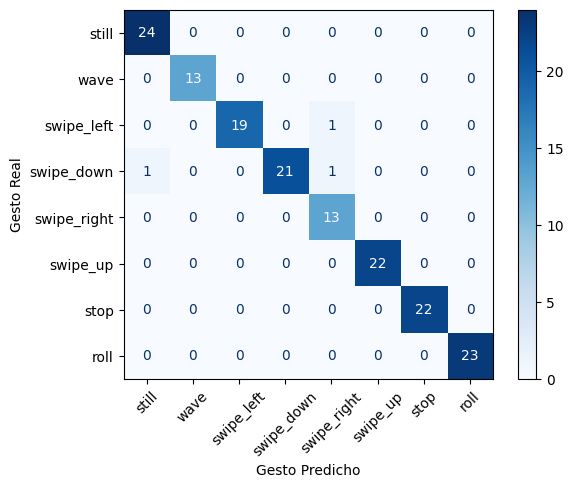

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dnn_mega.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GESTURES)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45)
plt.xlabel('Gesto Predicho')
plt.ylabel('Gesto Real')

plt.show()

In [ ]:
dnn_mega.save('/content/drive/MyDrive/Colab Notebooks/TFM/models_mega/dnn_8g.h5')

In [ ]:
dnn_mega_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/TFM/models_mega/dnn_8g.h5')

dnn_mega_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │           4,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,298 (20.70 KB)

 Trainable params: 5,296 (20.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Quick test
for i in range(10):

  # Inference example
  sample = np.array(X_test[i])
  sample = sample.reshape(1, 300)

  nn_output = dnn_mega_model.predict(sample)
  print(nn_output)
  pred = np.argmax(nn_output)
  print(f"Predicted: {pred}", end="")
  print(f" ---> Real: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[5.3060140e-11 8.4155845e-06 4.6890773e-06 6.0456873e-06 3.5071700e-06
  1.9057918e-08 9.9997747e-01 8.7531621e-11]]
Predicted: 6 ---> Real: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[3.5556037e-02 1.6116353e-03 5.4385670e-04 4.1082809e-03 1.9548297e-06
  1.8748100e-06 9.5804077e-01 1.3556395e-04]]
Predicted: 6 ---> Real: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[9.9172884e-01 2.0395551e-05 7.9202675e-04 5.8213885e-05 1.7501555e-04
  4.9784718e-05 1.3502683e-04 7.0406236e-03]]
Predicted: 0 ---> Real: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.9893071e-11 4.1964906e-04 1.4127084e-04 3.6758031e-11 7.0201565e-04
  9.9871552e-01 2.0742993e-05 7.9714869e-07]]
Predicted: 5 ---> Real: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[9.9916875e-01 3.4330049e-05 1.7938059e-05 1.7809865e-04 9.4942689e-06
  7.6734059e-06 1.9289460e-04 3.9076098e-04]]
Predicted: 0 ---> Real: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2.58829886e-07 6.28263660e-06 7.87927775e-07 1.764

In [ ]:
# Print model data
weights_biases = dnn_mega_model.get_weights()
model_data = {}

for layer in dnn_mega_model.layers:
    activation = layer.activation.__name__ if hasattr(layer, "activation") else None,
    shape = {}
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    model_data[layer.name] = {
        "activation": activation,
        "shape": {"input":layer.input.shape, "output":layer.output.shape},
        "weights": weights,
        "ranges": {"max":weights.max(), "min":weights.min()},
        "biases": biases
    }

print(model_data)

{'dense_4': {'activation': ('relu',), 'shape': {'input': (None, 300), 'output': (None, 16)}, 'weights': array([[ 0.01288873,  0.07233959,  0.05512958, ..., -0.04951217,
         0.21101916, -0.1971967 ],
       [-0.00251654, -0.04879013,  0.09594685, ..., -0.10742164,
        -0.06577498,  0.07541603],
       [-0.01942545,  0.20104317, -0.21995322, ...,  0.22652099,
        -0.15871745,  0.27387577],
       ...,
       [ 0.10624203, -0.01411109,  0.03246846, ..., -0.0258054 ,
         0.0665004 ,  0.01316953],
       [ 0.20667973,  0.06537467, -0.1533862 , ..., -0.06070613,
         0.09239639,  0.04791529],
       [-0.16993804,  0.19364382, -0.3616962 , ...,  0.01529392,
         0.00595151, -0.04351286]], dtype=float32), 'ranges': {'max': 0.3450787, 'min': -0.4229807}, 'biases': array([ 0.21458563, -0.0315042 ,  0.18943267,  0.2250497 ,  0.12531672,
        0.096762  ,  0.22994924,  0.27796736,  0.06993438, -0.08236435,
        0.18822527,  0.17591105,  0.03676216,  0.10202077,  0.01

In [ ]:
# Taken from https://github.com/GiorgosXou/NeuralNetworks#-training
weights_biases = dnn_mega_model.get_weights()

IS_BIASED = True
IS_PROGMEM = True
INT_RANGE  = 255.0       # Range of int16_t -32768 to 32767 | for int8_t use 255
INT_MIN = -127
FP_RANGE  = 51.0        # Range of weights -100   to 100   | for int8_t use 51
TYPE_NAME  = 'int8_t'    # or 'int16_t'

def quantize_float_to_int(w, min_fp, max_fp):
    """Quantizes a float32 into an 8 bit integer."""
    S = (FP_RANGE) / (INT_RANGE)
    return round(w / S)

def int_to_float(q, min_fp, max_fp):
    """Transform an 8 bit int into the corresponding float32."""
    fp_range = max(abs(min_fp), abs(max_fp))
    return np.float32(np.float32(fp_range) / (INT_RANGE)) * np.float32(q)

test = 0.03456
qt = quantize_float_to_int(test, 0.1, -0.1)
print(qt)

print(int_to_float(qt, 0.1, -0.1))

0
0.0


In [ ]:
# Quantizes and prints Biases in C++ format

if IS_PROGMEM:
    print("\n#define _1_OPTIMIZE 0B11000000 // PROGMEM + Highly-Recommended Optimization For RAM")
else:
    print("\n#define _1_OPTIMIZE 0B01000000 // Highly-Recommended Optimization For RAM")

print("#define _2_OPTIMIZE 0B00100100 // MULTIPLE_BIASES_PER_LAYER + int8_t quantization \n")

# Biases Print
print('const PROGMEM int8_t biases[] = {')
for l, (w, b) in enumerate(zip(weights_biases[::2], weights_biases[1::2])):
    print('  ', end='')
    min_fp = np.min(b)
    max_fp = np.max(b)
    for j in range(0, w.shape[1]):
        qt = quantize_float_to_int(b[j], min_fp, max_fp)
        print(qt, end=', ')
    print(' ')
print('};\n')


#define _1_OPTIMIZE 0B11000000 // PROGMEM + Highly-Recommended Optimization For RAM
#define _2_OPTIMIZE 0B00100100 // MULTIPLE_BIASES_PER_LAYER + int8_t quantization 

const PROGMEM int8_t biases[] = {
  1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,  
  0, -1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,  
  1, 1, 0, 1, 0, -1, 1, 0,  
  1, -1, 0, -1, 0, 0, 1, -1,  
};



In [ ]:
# Quantizes and prints Weights in C++ format

print('const PROGMEM int8_t weights[] = {', end="")
for l, (w, b) in enumerate(zip(weights_biases[::2], weights_biases[1::2])):
    print()
    min_fp = np.min(w)
    max_fp = np.max(w)
    for j in range(0, w.shape[1]):
        print('  ', end='')
        for i in range(0, w.shape[0]):
            qt = quantize_float_to_int(w[i][j], min_fp, max_fp)
            print(qt, end=', ')
            w[i][j] = int_to_float(qt, min_fp, max_fp)
        print(' ')
print('};\n')

const PROGMEM int8_t weights[] = {
  0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 1, -1, 0, -1, 0, 0, 1, 0, 0, 0, -1, -1, 1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, -1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, -1, 1, -1, 0, 0, 1, -1, -1, 0, -1, 0, 1, -1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, -1, 1, -1, -1, 0, 1, -1, 0, 0, 0, 0, 1, -1, 1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 1, -1, 0, 1, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, -1, 0, 1, 0, -1, 1, -1, 0, 1, 0, 0, 2, -1, 1, 0, 1, 0, 1, -1, 1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, -1, 0, 0, 1, 0, 1, -1, 0, 1, 1, -1,  
  0